In [1]:
import numpy as np
import pandas as pd
import re   # regular expression
print("Libraries Imported.")

Libraries Imported.


In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 32AF-3DA3

 Directory of c:\Users\HP\Desktop\internship\Email _Classification

08/11/2024  12:35 PM    <DIR>          .
08/11/2024  12:35 PM    <DIR>          ..
08/09/2024  09:45 PM               832 app.py
08/11/2024  05:02 PM            54,666 email-classification.ipynb
08/11/2024  12:20 PM    <DIR>          models
08/11/2024  12:18 PM           477,907 SMSSpamCollection.txt
08/11/2024  12:36 PM    <DIR>          static
08/10/2024  10:17 PM    <DIR>          templates
               3 File(s)        533,405 bytes
               5 Dir(s)  180,679,499,776 bytes free


In [3]:
# message = """
# Hlo I'm kuldeepkarate a kumite player.
# thank you....
# """

# file = open('demo.txt','w')
# file.write(message)
# file.close()

In [4]:
# file handling...

# message = "hlo we are from upflairs, thank you...!\n"

# with open('demo.txt','a') as file:
#      for i in range(1,11):
#         file.write(message)

In [5]:
# with open('demo.txt','r') as file:
#     data = file.read()
#     print(data)

In [6]:
file_path = "SMSSpamCollection.txt"

file = open(file_path) 
data = file.read()
file.close()

In [7]:
print("total no. of emails: ", len(data.split('\n')))

total no. of emails:  5575


In [8]:
data.split('\n')[1]

'ham\tOk lar... Joking wif u oni...'

In [9]:
x = []
y = []
for line in data.split('\n'):
    if len(line.split('\t')) == 2:
        y.append(line.split('\t')[0])
        x.append(line.split('\t')[1])

In [10]:
len(x) , len(y)

(5574, 5574)

In [11]:
x[1]  # email message

'Ok lar... Joking wif u oni...'

In [12]:
y[1]  # label

'ham'

In [13]:
# create dataframe....
email_data = pd.DataFrame({"email_message":x,"labels":y})
email_data.head()

,email_message,labels
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [14]:
df2 = pd.read_table(file_path)
df2.columns = ["labels","email_message"]
df2.head()

,labels,email_message
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [15]:
print("Total no. of emails : ",df2.shape[0])

Total no. of emails :  5571


In [16]:
single_email = df2['email_message'][1]
single_email

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [17]:
type(single_email)

str

In [18]:
single_email = single_email.lower()

In [19]:
re.findall("2",single_email)

['2', '2', '2', '2', '2']

In [20]:
re.sub("[^a-zA-Z ]","",single_email)   # substitute

'free entry in  a wkly comp to win fa cup final tkts st may  text fa to  to receive entry questionstd txt ratetcs apply overs'

In [21]:
single_email.replace('2','')

"free entry in  a wkly comp to win fa cup final tkts 1st may 005. text fa to 8711 to receive entry question(std txt rate)t&c's apply 0845810075over18's"

In [22]:
df2

,labels,email_message
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...
...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...
5567,ham,Will ü b going to esplanade fr home?
5568,ham,"Pity, * was in mood for that. So...any other s..."
5569,ham,The guy did some bitching but I acted like i'd...


In [23]:
for i in range(len(df2['email_message'])):
    email_message = df2['email_message'][i]
    email_message = email_message.lower()
    df2['email_message'][i] = re.sub("[^a-zA-z ]","",email_message)

C:\Users\HP\AppData\Local\Temp\ipykernel_14612\1755308151.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df2['email_message'][i] = re.sub("[^a-zA-z ]","",email_message)


In [24]:
df2

,labels,email_message
0,ham,ok lar joking wif u oni
1,spam,free entry in a wkly comp to win fa cup final...
2,ham,u dun say so early hor u c already then say
3,ham,nah i dont think he goes to usf he lives aroun...
4,spam,freemsg hey there darling its been weeks now ...
...,...,...
5566,spam,this is the nd time we have tried contact u u...
5567,ham,will b going to esplanade fr home
5568,ham,pity was in mood for that soany other suggest...
5569,ham,the guy did some bitching but i acted like id ...


In [25]:
df2['labels'].value_counts()

labels
ham     4824
spam     747
Name: count, dtype: int64

In [26]:
ham = df2[df2['labels'] == "ham"]
spam = df2[df2['labels'] == "spam"]

In [27]:
print(spam.shape)
print(ham.shape)

(747, 2)
(4824, 2)


In [28]:
ham.sample

<bound method NDFrame.sample of      labels                                      email_message
0       ham                            ok lar joking wif u oni
2       ham        u dun say so early hor u c already then say
3       ham  nah i dont think he goes to usf he lives aroun...
5       ham  even my brother is not like to speak with me t...
6       ham  as per your request melle melle oru minnaminun...
...     ...                                                ...
5564    ham                                          huh y lei
5567    ham                 will  b going to esplanade fr home
5568    ham  pity  was in mood for that soany other suggest...
5569    ham  the guy did some bitching but i acted like id ...
5570    ham                          rofl its true to its name

[4824 rows x 2 columns]>

In [29]:
ham = ham.sample(1000)    # run only once....

In [30]:
ham.shape

(1000, 2)

In [31]:
spam.sample(1000,replace=True).shape   # 747

(1000, 2)

In [32]:
spam.shape , ham.shape

((747, 2), (1000, 2))

In [33]:
new_df = pd.concat([spam,ham],axis=0)
new_df.shape

(1747, 2)

In [34]:
new_df.duplicated().sum()

np.int64(149)

In [35]:
spam.duplicated().sum()

np.int64(130)

In [36]:
ham.duplicated().sum()

np.int64(19)

In [37]:
new_df['labels'].value_counts()

labels
ham     1000
spam     747
Name: count, dtype: int64

In [38]:
new_df['labels'] = new_df['labels'].map({'spam':1,'ham':0})

In [39]:
x = new_df['email_message']
y = new_df['labels']

In [40]:
type(x)

pandas.core.series.Series

In [41]:
x = x.values

In [42]:
type(x)

numpy.ndarray

In [43]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
bow_obj = CountVectorizer(max_features=1500,stop_words='english')

x = bow_obj.fit_transform(x)
x

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 12671 stored elements and shape (1747, 1500)>

In [44]:
x_transformed = x.toarray()

In [45]:
x_transformed

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [46]:
y.shape  , x_transformed.shape

((1747,), (1747, 1500))

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_transformed,y,test_size=0.15,random_state=42)

In [48]:
# model training slgorithm train....
from sklearn.naive_bayes import MultinomialNB, BernoulliNB,GaussianNB
mnb = MultinomialNB()
bnb = BernoulliNB()

mnb.fit(x_train,y_train)
bnb.fit(x_train,y_train)

print("Algorithm trained on the data!")

print("Multinomial Naive bayes")
print("Training score : ",mnb.score(x_train,y_train)*100)
print("Testing score : ",mnb.score(x_test,y_test)*100)
print()
print("Bernoli Naive bayes")
print("Training score : ",bnb.score(x_train,y_train)*100)
print("Testing score : ",bnb.score(x_test,y_test)*100)

Algorithm trained on the data!
Multinomial Naive bayes
Training score :  96.49595687331536
Testing score :  94.29657794676805

Bernoli Naive bayes
Training score :  95.88948787061994
Testing score :  94.29657794676805


In [49]:
# prediction
prediction = mnb.predict(x_test)
prediction

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1])

In [50]:
y_test.values

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1])

In [51]:
evaluation_df = pd.DataFrame({"actual_class":y_test.values,"predicted_class":prediction})
evaluation_df

,actual_class,predicted_class
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
258,1,1
259,0,0
260,0,0
261,0,1


In [52]:
evaluation_df['actual_class'] = evaluation_df['actual_class'].map({1:'spam',0:'ham'})   # run only once...
evaluation_df['predicted_class'] = evaluation_df['predicted_class'].map({1:'spam',0:'ham'})

In [53]:
from sklearn.metrics import confusion_matrix,classification_report

In [54]:
#confusion_matrix(ACTUAL_VALUE , PREDICTED_VALUE)
matrix = confusion_matrix(evaluation_df['actual_class'],evaluation_df['predicted_class'])
matrix

array([[135,   6],
       [  9, 113]])

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

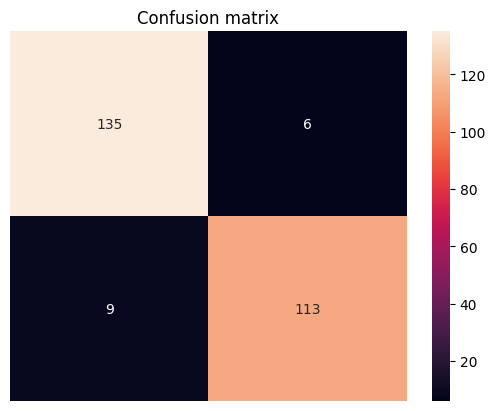

In [56]:
sns.heatmap(matrix,annot=True,fmt='d')
plt.title('Confusion matrix')
plt.axis('off')
plt.show()

In [57]:
print(classification_report(evaluation_df['actual_class'],evaluation_df['predicted_class']))

              precision    recall  f1-score   support

         ham       0.94      0.96      0.95       141
        spam       0.95      0.93      0.94       122

    accuracy                           0.94       263
   macro avg       0.94      0.94      0.94       263
weighted avg       0.94      0.94      0.94       263



In [58]:
# models save..
import joblib,os
os.makedirs('models',exist_ok=True)

joblib.dump(mnb,'./models/multinomialnaivebayes.lb')
joblib.dump(bnb,'./models/bernolinaivebayes.lb')
joblib.dump(bow_obj,'./models/countvectorizer.lb')
print("Your object is saved.")

Your object is saved.
